<a href="https://colab.research.google.com/github/tejatanush/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Description:**

This model is capable to predict accurate prices of houses in a city using features like area,No.of bedrooms, No. of bathrooms, No.of stairs...etc.Dataset contains 13 different features on which price of house depends.This model makes easier to placeholders and in real estate field.It makes customers  easier to know price of desired house.

# Steps to build a model:


1.   Import required libraries
2.   Import dataset
3.   Data Preprocessing
*   Find and fill missing values
*   Encoding data
*   Splitting into training and testing set
*   Feature Scaling
4.   Selection of model
5.   Build a model
6.   Evaluate model
7. Predict Results
8.   Visualize results


# 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 2. Import Dataset
This dataset was imported from kaggel website. It consists of many independent features on which price of house is predicted accurately.
# Reference:
 https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
Let's split our data into two parts. Dependent variable prices as 'y' and independent variables as 'x'.

In [ ]:
dataset=pd.read_csv("Housing.csv")
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
1,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
2,5110000,6100,3,1,1,yes,no,yes,no,yes,0,yes,semi-furnished
3,3780000,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
4,5810000,5828,4,1,4,yes,yes,no,no,no,0,no,semi-furnished


We can visualize data between different features how one depends on other or how one feature changes with respect to other but it will not make any sense to predict prices. It just helps in becoming one with data.

# 3. Data Preprocessing

# Find and Filling missing values

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


As there no any missing values in dataset we can skip this step.

# Encoding data
From our data we have categorical features and some label features. So that we should encode categorcal and label encoding in 2 steps.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode = [4, 5, 6, 7, 8, 10]
for column in columns_to_encode:
    x[:, column] = le.fit_transform(x[:, column])
ct=ColumnTransformer(transformers=[('encoder5',OneHotEncoder(),[11])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
x=x.astype('float32') #make as tensors
y=y.astype('float32')
#let's observe any row how the dataset was encoded
print(x[2])

[0.0e+00 1.0e+00 0.0e+00 6.1e+03 3.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00
 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00]


We can see that all the columns which required encoding occurs and area of house is in 3rd index.

#Splitting into training and test set
Let's split data so that 80% of data will be training set and remaining 20% will be testing set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#Let's check how data splitted
print(x_train)
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 2. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 3. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
[ 3710000.  8890000.  3360000.  8190000.  6650000.  3115000.  4165000.
  3500000.  3465000.  2310000.  3087000.  6510000.  4830000.  6160000.
  4193000.  2870000.  2660000.  3500000.  3780000.  5110000.  5950000.
  6510000.  7962500.  1960000.  3500000.  3290000.  3640000.  2940000.
  5943000.  5250000.  8463000.  4277000.  4305000.  6475000.  3220000.
  4200000.  2275000.  7560000.  3080000.  5810000.  4340000.  4200000.
  3500000.  2940000.  4480000.  5565000.  4550000.  3115000.  5215000.
  8080940.  3430000.  7350000.  5075000.  3465000.  6615000.  2800000.
  3360000.  6755000.  2870000.  3143000.  4900000.  4900000.  3675000.
  5600000.  3360000.  7210000.  3500000.  5250000.  6090000.  8645000.
  4007500.  2800000.  5873000.  3493000.  6405000.  6650000.  4200000.
  3220000.  4515000.  4403000.  3850000.  3500000.  9100000.  4

We can see that data is not in certain order.... it mean the data is splitted in random.

#Feature Scaling
Let's normalize the dependent variable (price) and area feature in independent variables. Because these are having unique numerical values and by normalizing them model may understand better patterns between them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train[:,3]=sc.fit_transform((x_train[:,3]).reshape(-1,1)).flatten()
x_test[:,3]=sc.transform((x_test[:,3]).reshape(-1,1)).flatten()
y_train=sc.fit_transform(y_train.reshape(-1,1))
y_test=sc.transform(y_test.reshape(-1,1))
print(x_train[:,3])
print(y_train)

[0.11745363 0.18852744 0.21371108 0.2836656  0.31584468 0.11157747
 0.20531654 0.16334382 0.01678908 0.08919202 0.4333683  0.44386145
 0.15774745 0.181532   0.10807975 0.07939838 0.00664568 0.772228
 0.11857292 0.6649178  0.12556836 0.3333333  0.2864638  0.1059811
 0.14585519 0.29066107 0.07660021 0.11857292 0.95802724 0.13256383
 0.2864638  0.10458201 0.17453653 0.14375654 0.08499475 0.3564183
 0.14445609 0.2864638  0.21371108 0.20251834 0.31794333 0.01678908
 0.11857292 0.3294858  0.44386145 0.17453653 0.11297655 0.13606155
 0.08919202 0.3564183  0.14655474 0.2864638  0.26687652 0.2388947
 0.6012591  0.05211611 0.12906611 0.2864638  0.24449107 0.181532
 0.2724729  0.24449107 0.12067154 0.20251834 0.12696746 0.2864638
 0.27806923 0.2374956  0.3294858  0.42987058 0.10877928 0.14375654
 0.66841555 0.20951381 0.20251834 0.26547742 0.2724729  0.1724379
 0.11227702 0.21091288 0.13606155 0.38090238 0.2864638  0.12137109
 0.07450156 0.79013634 0.09338929 0.15564883 0.20531654 0.2864638
 0.35

So, the price and area were normalized into values between 0 and 1.

#4. Selection of model
Hense this prices of house mainly depends on different independent features so let's select a regression model. It depends on many features so multiple regression model will be the best. But let's try it with deep learning models because there any many observations in our dataset. Deep nueral networks models will be the best approach for this problem.

#5. Build a model


**Create model:** In regression problems use activation function as ReLU for input and hidden layers. For output layer we can use ReLU or linear but it depends. If our model contains negative values as output we can use ReLU. But all the outputs of our model are positive so better to use linear activation function.

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu',input_shape=[14]),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='linear')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1500      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2521 (9.85 KB)
Trainable params: 2521 (9.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here we can see summary of model that how model constructed and no.of hidden layers and parameters...etc.


**Compile Model:**
For regression problems use optimizers as Adam od RMSprop so that learning rate will change as per data aptterns to train model.

In [ ]:
model.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                metrics=['mse'])

**Fit Model:** Train model for 30 epochs or more and ensure to add validation data for better vizualisation so that trained model can evaluate test set simultaneously.

In [ ]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=[x_test,y_test])

Epoch 1/30
14/14 [==============================] - 1s 15ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 4/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 6/30
14/14 [==============================] - 0s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 7/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 8/30
14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - mse: 0.0

Looks like our model performed weel for this type of confusing data.

#6. Evaluate Model

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0108 - mse: 0.0108


[0.010810944251716137, 0.010810944251716137]

#7. predict Results
Let's Predict results of y_test and compare the original results of y_test.

In [ ]:
y_pred=model.predict(x_test)
y_pred=y_pred.reshape(-1,1)
y_pred_original = sc.inverse_transform(y_pred)
y_test_original = sc.inverse_transform(y_test)

# Print predicted and actual values
print(np.concatenate((y_pred_original, y_test_original), axis=1))

4/4 [==============================] - 0s 3ms/step
[[ 6883485.5  8295000.5]
 [ 2961643.   1890000.1]
 [ 2961643.   1750000. ]
 [ 7051693.5  8575000. ]
 [ 7725145.   7489999.5]
 [ 4993870.   3920000. ]
 [ 7182845.5  6789999.5]
 [ 5511822.   4543000. ]
 [ 7006997.5  9100000. ]
 [ 6058398.   6300000. ]
 [ 3142651.   6895000.5]
 [ 3254597.   5145000. ]
 [ 7291161.5  7350000. ]
 [ 2961643.   3500000. ]
 [ 5142716.   7140000. ]
 [ 7462837.   7524999.5]
 [ 2961643.   3675000. ]
 [ 9805327.  10150000. ]
 [ 5474517.   5250000. ]
 [ 2961643.   2485000. ]
 [ 2961643.   1890000.1]
 [ 3949450.2  5495000. ]
 [ 3541075.5  3605000. ]
 [ 5866433.5  5215000. ]
 [ 3986920.2  3332000. ]
 [ 5735160.5  4200000. ]
 [ 3881760.   3744999.8]
 [ 2961643.   3633000. ]
 [ 4096984.   4130000.2]
 [ 5760007.5  5950000. ]
 [ 3866218.5  4403000. ]
 [ 2961643.   3780000.2]
 [ 5980423.   6650000. ]
 [ 6838137.   7000000. ]
 [ 4196489.   4767000. ]
 [ 4211887.   4900000. ]
 [ 3251879.8  3703000. ]
 [ 4882367.   4473000. ]

Our model performed better that predicted results are some accurate to original values.

#8. Visualize Results
Let's visualize the y_pred (predicted prices of houses) and y_test (actual prices of houses) on a graph.

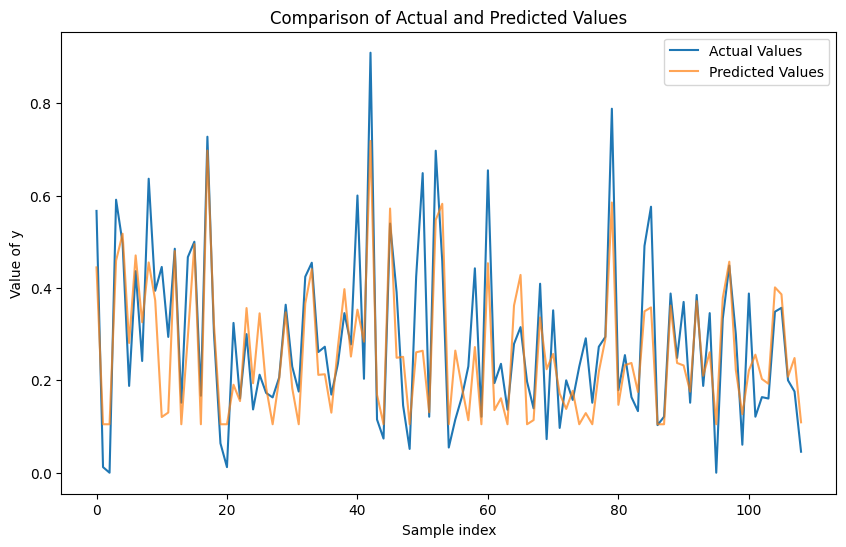

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample index')
plt.ylabel('Value of y')
plt.legend()
plt.show()

Results are good and accurate to actual prices. We can observe the trends of prices on graph.